In [48]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
train_df=pd.read_csv("test.csv")
test_df=pd.read_csv("train_cab.csv")
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)

(9914, 6)
Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
(16067, 7)
Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [8]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])
train_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
train_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [10]:
train_df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


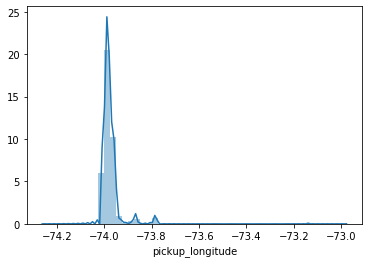

In [15]:
sns.distplot(train_df['pickup_longitude'])

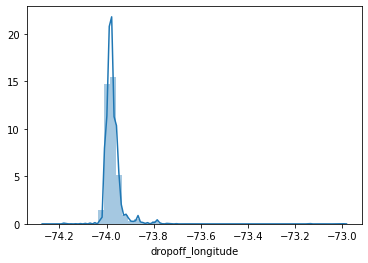

In [16]:
sns.distplot(train_df['dropoff_longitude'])

In [17]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value -74.006377
drop_off latitude max value 41.366138
drop_off longitude min value -74.42933199999999
drop_off longitude max value 40.802437
pickup latitude min value -74.006893
pickup latitude max value 401.083332
pickup longitude min value -74.438233
pickup longitude max value 40.766125


In [18]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [19]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)


before droping (9914, 6)
after droping (9913, 6)


In [21]:
print("before droping", train_df.shape)
train_df=train_df[train_df['pickup_latitude']>0]
print("after droping", train_df.shape)

before droping (9913, 6)
after droping (9913, 6)


In [22]:

import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [23]:
train_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,27,13,Tuesday,1,2015
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,27,13,Tuesday,1,2015
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,8,11,Saturday,10,2011
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1,21,Saturday,12,2012
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,1,21,Saturday,12,2012


In [24]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 9913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9913 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9913 non-null   float64            
 2   pickup_latitude    9913 non-null   float64            
 3   dropoff_longitude  9913 non-null   float64            
 4   dropoff_latitude   9913 non-null   float64            
 5   passenger_count    9913 non-null   int64              
 6   day                9913 non-null   int64              
 7   hour               9913 non-null   int64              
 8   weekday            9913 non-null   int64              
 9   month              9913 non-null   int64              
 10  year               9913 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(6)
memory usage: 929.3 KB


In [26]:
train_df=train_df[train_df['passenger_count']<=8]

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 9913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9913 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9913 non-null   float64            
 2   pickup_latitude    9913 non-null   float64            
 3   dropoff_longitude  9913 non-null   float64            
 4   dropoff_latitude   9913 non-null   float64            
 5   passenger_count    9913 non-null   int64              
 6   day                9913 non-null   int64              
 7   hour               9913 non-null   int64              
 8   weekday            9913 non-null   int64              
 9   month              9913 non-null   int64              
 10  year               9913 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(6)
memory usage: 929.3 KB


In [31]:
train_df.drop(["pickup_longitude"], axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 9913
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_latitude    9913 non-null   float64
 1   dropoff_longitude  9913 non-null   float64
 2   dropoff_latitude   9913 non-null   float64
 3   passenger_count    9913 non-null   int64  
 4   day                9913 non-null   int64  
 5   hour               9913 non-null   int64  
 6   weekday            9913 non-null   int64  
 7   month              9913 non-null   int64  
 8   year               9913 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 774.5 KB


In [34]:
x=train_df.drop("pickup_latitude", axis=1)

In [37]:
y=train_df.drop("pickup_latitude", axis=1)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [39]:
x_train.head()

,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
126,-73.986270,40.767207,1,14,13,6,6,2014
1238,-74.005620,40.740178,1,29,16,3,9,2010
3429,-73.971390,40.792580,1,23,0,1,6,2014
4896,-73.968037,40.754056,1,24,19,6,10,2009
4670,-73.947783,40.795358,1,29,8,5,1,2010


In [40]:
x_test.head()

,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
9713,-73.956727,40.766967,5,25,22,3,9,2013
5827,-73.956533,40.784182,1,7,13,4,2,2013
4894,-73.967625,40.762894,1,24,19,6,10,2009
7928,-74.010333,40.719123,2,28,21,5,3,2014
6523,-73.982906,40.746848,1,4,8,3,12,2013


In [41]:
x_train.shape

(7930, 8)

In [42]:
x_test.shape

(1983, 8)

In [44]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [47]:
predictedvalues = lrmodel.predict(x_test)
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 5.38900744799824e-15


In [49]:
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)